**Make cartoon effect using OpenCV**

In [3]:
#Import Library
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load Image

In [4]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

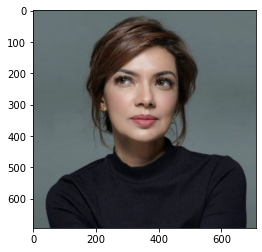

In [5]:
filename = "NShihab.png"
img = read_file(filename)

org_img = np.copy(img)

Create Edge Mask

In [6]:
def edge_mask(img, line_size, blur_value):
    """
    input: Gray Scale Image
    output: Edges of Images
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, line_size, blur_value)

    return edges


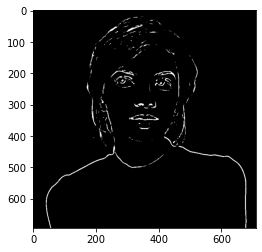

In [7]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap = "binary")
plt.show()

Reduce the Color Palette

In [8]:
def color_quantization(img, k):

    #Transform the image
    data = np.float32(img).reshape((-1,3))

    #Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    #Implementasi K-Means

    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

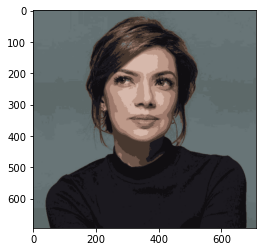

In [9]:
img = color_quantization(img, k=10)

plt.imshow(img)
plt.show()

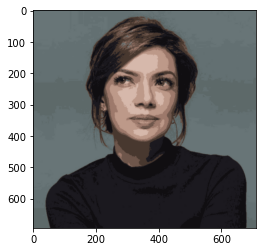

In [10]:
#Reduce the noice

blurred = cv2.bilateralFilter(img, d = 3, sigmaColor= 200, sigmaSpace= 200)

plt.imshow(blurred)
plt.show()

Combine Edge Mask with the Quantiz Img

In [11]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask= edges)

    plt.imshow(org_img)
    plt.title('org_img')
    plt.show()


    plt.imshow(c)
    plt.title('Cartoonified Image')
    plt.show()
 

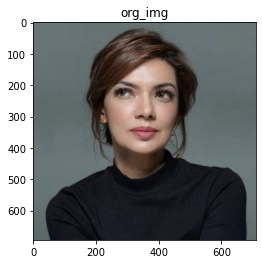

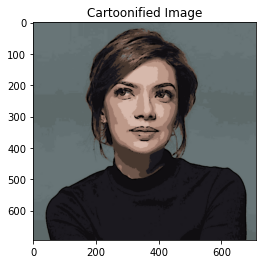

In [12]:
cartoon()